<a href="https://colab.research.google.com/github/Liang130520/Deep_Learning/blob/main/DeepLearning_1107_6_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
" Machine Learning " # 處理表格類資料

" 深度學習(Deep Learning) " # 處理表格以外的資料, 屬 "模仿" 人類神經網路的形式
# -> 接收端 到 輸出端, 所有係數相加, 再進行轉換輸出, 遵守"全有全無率"
# --> X1 * W1 + X2 * W2 + ...... ---> WiXi "激活(Activation)"" ----> 輸出, 若無激活, 則無輸出
# 意即為 分類器 / 感知器 (Perceptron), 感知有或無的情形

" Perceptron的調整 "
# 為了模擬感受大小的差異, 將一條神經(程式)改成有中間值的概念

" Sigmoid " # -> Sigmoid => y = 1 / (1 + e ** -x)
# 為何要有 (1 +)?  ->  if y = 1 / e ** -x --> y = e ** x
# 令 x = 0, 則 y = 1
# 令 x = -∞, 則 y ≒ 0
# 令 x = ∞, 則 y ≒ ∞
# --> y = 1 / (1 + e ** -x), if x = 0, 則 y = 0.5, if x = -∞, 則 y ≒ 0, if x = ∞, 則 y ≒ 1.
# ---> (1 +) 為設定天花板用的, if 天花板想設定為 2, 則改為 (0.5 +)即可, 以此類推

" Logistic Regression" 
# 仍為分類器, 非回歸, Logistic 等於 Sigmoid, 為 Sigmoid 的函式名稱

" Multi-Layer Perceptron "
# 多層 Logistic Regression 組合, 再做額外的 Logistic Regression 轉換
# 其中只要有用到 Logistic Regression 就必定要 "轉換" 輸出, 才能變成 多層結構
# step1 : 係數隨機 (a1, a2, b1, b2, c1, c2, w1, w2, ......)
# step2 : 調整係數, 須越靠近 "正確"", 不斷調整
# 係數該如何調整, if 要取得最低點, 則往下延伸, 如遇到上升, 則返回停下
# -> 即取得 m(斜率), 大小代表陡峭程度, 正負代表上升方向(正往右, 負往左)

" 斜率下坡理論 "
# 欲往 值低方向 走, 則方向應往 負斜率 走, 因地平面斜率趨近於 0, 斜率越大, 越往反向走, 大小則應考量abs(斜率), 思考該走大步或小步.
# 愈往 值高方向 走, 則方向應往 正斜率 走, 因地平面斜率趨近於 0, 斜率越大, 越往該方向走, 大小則應考量abs(斜率), 思考該走大步或小步.

" 多維計算方式 " # z = 2 * x ** 2 +  3 * y ** 3, p1 = (1, 2), 要往谷底走
" 偏微分 "
# step1 : 固定某邊, 分別微分兩個平面, mx = 4 * x, my = 9 * y **2
# step2 : (mx, my) = (4x, 9 * y ** 2), 代入(1, 2), 得(4, 36), 依斜率下坡理論, 得 -(4, 36), 取得方向(往左)及大小(4, 36)
# 偏微分: mx = bz / bx, my = bz / by, 得(mx, my)

" Loss(損失值) "
# Multi-Layer Perceoptron 如何評估, ((pre - true) ** 2 + ......) / n -> Loss(損失值), 等於 MSE 計算方式
# 將 Loss 定為 三維中的 z 維, 即可取得每個係數的調整項, a1 = -(bloss) / ba1
# --> a1下 = a1現 + [- (bloss / ba1現) * 步長]
# 梯度下降(多口斜率) -> 定隨機維度下降 -> 每個維度皆以偏微分計算該調整幅度即可

" 模型 " 
# step1 : 裡面的各個維度 W 給予隨機值
# step2 : 定義 loss 如何計算
# step3 : 調整每個參數 -> 利用 min(loss) => W下 = W現 + [- (bloss / bW) * 步長]

' 模型 '

In [20]:
" 微分 連鎖法則 "
# f(x) = 2x, g(x) = x ** 2, if g(f(x)) = ?
# m = dy / dx -> (da / dx) * (dy / da) = (2x / dx) * (a ** 2 / da) = 2 * 2a = 4a = 8x
# --> 每段微分相乘

" Sigmoid 微分連鎖法則 " # 求 m = dy / dx
# 對 y = 1 / (1 + (e ** -x)) 進行拆解成數個函式
# step1 : f(x) = -x --> g(x) = e ** x --> h(x) = 1 + x --> m(x) = 1 / x, 共四段可取得 y
# step2 : dy / dx = (da / dx) * (db / da) * (dc / db) * (dy / dc)
# step3 : => (-x / dx) * (e ** a / da) * ((1 + b) / db) * (dy / dc)
# step4 : ==> -1 * (e ** a)[參考微分表] * 1 * (- c ** -2) = (e ** a) / (c ** 2)
# step5 : ===> a = -x, b = e ** -x, c = 1 + (e ** -x) 
# step6 : ====> m = (e ** -x) / [(1 + (e ** -x )) ** 2]
# if x = 0, m = 0.25

" 調整多層參數 "
# 調整 a1, -bloss / ba1 = d1 * d2 * d3 * d4 * d5
# 調整 c1, -bloss / ba1 = d3 * d4 * d5
# --> d2 & d4 是轉換輸出, 為 Sigmoid 微分項, 則最多 0.25, 相乘最多為 0.625
# ---> 若經過越多層次, 意即路徑越長, 越多 Sigmoid, 將越趨近於 0, 即谷底可能, 但實則未移動, 為初始位置 ==> 被稱作梯度消失現象

" 緩解梯度消失辦法 "
# d2 代換成其他的, 只有最後一個 Sigmoid 不改換, 因結果須由 0-1 輸出
# -> relu => if x < threshold, m = 0, if x >= threshold, m =1
# --> 若 d2 未激活, d2 = 0 (不調整, 因 m = 0)
# --> 若 d2 有激活, (-bloss / ba1) = - d1 * d2 * d3 * d4
# 中間層 : relu -> m = 1
# 輸出層 : Sigmoid, 看需要甚麼

"""重點"""

" 梯度下降 "
# a : 模型 weights 全部隨機
# b : 確定 loss 計算方式
# c : 調整 weights 讓 loss 最小化, W下 = W現 + ((- bloss / bw) * 步伐常數)

" 梯度消失 緩解方法 "
# if 激活
# 1.中間層 : relu -> x < th, m = 0, if x >= th, m = 1
# 2.輸出層 : Sigmoid, 看需要

' 梯度消失 緩解方法 '

In [21]:
" 圖像處理 mlp "
# 令 28*28 圖像共 784 pixel, p1, p2, ......, p783, p784
# 輸出層:分為10個類別值, 各類別是零的機率, P1, P2, ......, P9, P10, 其中每個皆用 Sigmoid 判斷, 利用正確答案調整輸出層的樣態, 取得何類別為 0 / 1
# 中間層:隨心控制層數及個數, 可考慮輸出層10倍往前不斷估算, but 問題困難, 資料過少, 易造成學不會, or 問題簡單, 資料太多, 易造成過擬合

' 圖像處理 '

In [22]:
# tensorflow 2 -> tensorflow + leras
# tensorflow 2 -> 不須特別安裝 gpu 版, 只要你安裝 cuda + cudnn, 自動執行

from tensorflow.keras.datasets.mnist import load_data
# (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data()

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


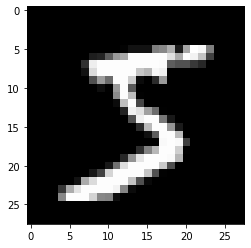

In [24]:
# 只要看到matplotlib有cmap參數
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要反過來, _r PiYG->PiYG_r
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])